In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Basic Libraries  for data analysis

import pandas as pd
import numpy as np

# Libraries for text preprocessing and NLP tasks
import re
import nltk
import random
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


In [3]:
# Suppress unnecessary warning messages for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Download required NLTK resources for tokenization, lemmatization, and stopword removal
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Importing  libraries for exploratory data analysis and visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
#accessing all the files from google drive

base_path = "/content/drive/MyDrive/infosys_datasets/"

#reading the first dataset
df1 = pd.read_csv(base_path + "analyst_ratings_processed.csv")

#reading the second dataset
df2 = pd.read_csv(base_path + "DAILY NEWS FOR STOCK MARKET PREDICTION.csv")

#reading the third dataset
df3 = pd.read_csv(base_path + "PRESS RELEASES.csv", nrows=5000)#reading only 5k rows due to large complexity of the file


In [26]:
# ===============================
# MILESTONE 1: DATA COLLECTION & PREPROCESSING
# ===============================


In [5]:
# Initialize lemmatizer and stopword list for text normalization
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Common text preprocessing function used across all datasets
def clean_text(text):
    text = str(text)

    # Retain alphabets, numbers, and important financial symbols
    text = re.sub(r"[^a-zA-Z0-9$%.\-\s]", " ", text)

    # Convert text to lowercase and remove extra spaces
    text = text.lower().strip()

    # Tokenize text into individual words
    tokens = nltk.word_tokenize(text)

    # remove stopwords & lemmatize
    tokens = [
        lemmatizer.lemmatize(tok)
        for tok in tokens
        if tok not in stop_words and len(tok) > 2
    ]
    # Tokenize text into individual words
    return " ".join(tokens)


In [6]:
# Apply common text preprocessing to all datasets

# Dataset 1: Analyst Ratings
df1["clean_text"] = df1["title"].apply(clean_text)

# Dataset 2: Daily News (combine Top1–Top25 first)
text_cols = [f"Top{i}" for i in range(1, 26)]
df2["combined_text"] = df2[text_cols].astype(str).agg(" ".join, axis=1)
df2["clean_text"] = df2["combined_text"].apply(clean_text)

# Dataset 3: Press Releases
df3["clean_text"] = df3["News"].apply(clean_text)


In [7]:
#printing the stop words top 20 from all datasets
print(list(stop_words)[:20])  # show sample stopwords
print("Total stopwords:", len(stop_words))


['off', 'too', 'be', 'by', "couldn't", 'all', 'don', "it'd", 'haven', 'herself', 'nor', 'or', "we'd", "won't", "he's", 'just', 'them', 'they', 'doesn', 'this']
Total stopwords: 198



===== EDA FOR Analyst Ratings =====
Shape: (1400469, 5)

Missing values:
 Unnamed: 0    1289
title            0
date          1289
stock         2578
clean_text       0
dtype: int64

Sample text:
 0                        stock hit 52-week high friday
1                     stock hit 52-week high wednesday
2                                 biggest mover friday
3                  stock moving friday mid-day session
4    security maintains neutral agilent technology ...
Name: clean_text, dtype: object

Word Count Stats:
count    1.400469e+06
mean     8.606487e+00
std      4.608267e+00
min      0.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.000000e+01
max      5.500000e+01
Name: word_count, dtype: float64


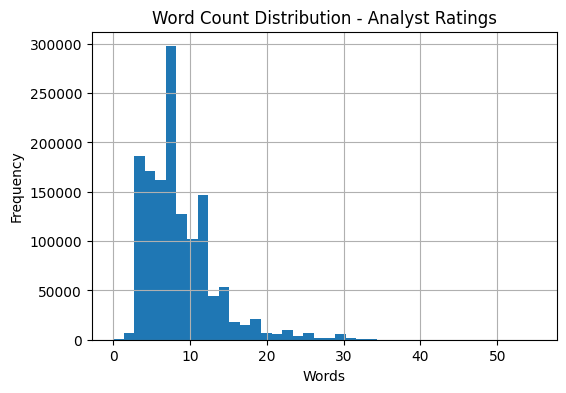

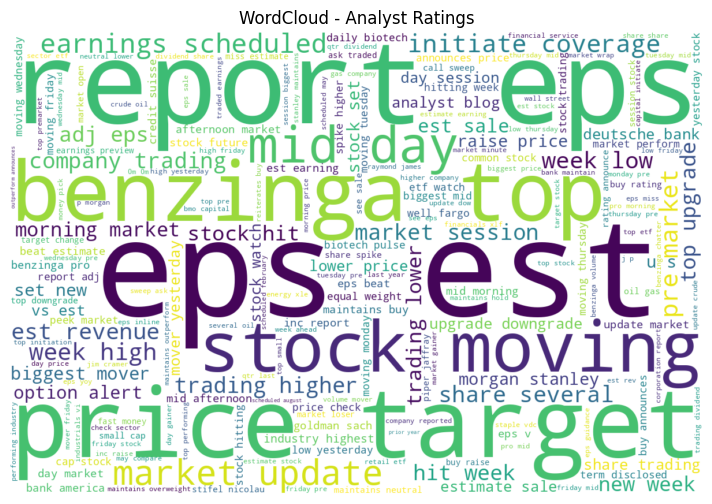


Most Common Words: [('stock', 199867), ('share', 147098), ('est', 140312), ('eps', 128580), ('report', 124275), ('market', 120345), ('update', 93291), ('earnings', 86586), ('sale', 85069), ('top', 80812), ('benzinga', 74282), ('price', 73969), ('buy', 68290), ('lower', 67880), ('announces', 66974), ('company', 65453), ('downgrade', 63721), ('trading', 61114), ('raise', 59824), ('upgrade', 58940)]

===== EDA FOR Daily News =====
Shape: (1989, 29)

Missing values:
 Date             0
Label            0
Top1             0
Top2             0
Top3             0
Top4             0
Top5             0
Top6             0
Top7             0
Top8             0
Top9             0
Top10            0
Top11            0
Top12            0
Top13            0
Top14            0
Top15            0
Top16            0
Top17            0
Top18            0
Top19            0
Top20            0
Top21            0
Top22            0
Top23            1
Top24            3
Top25            3
combined_text    0

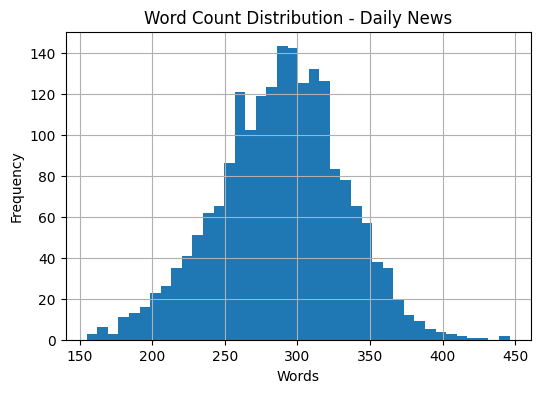

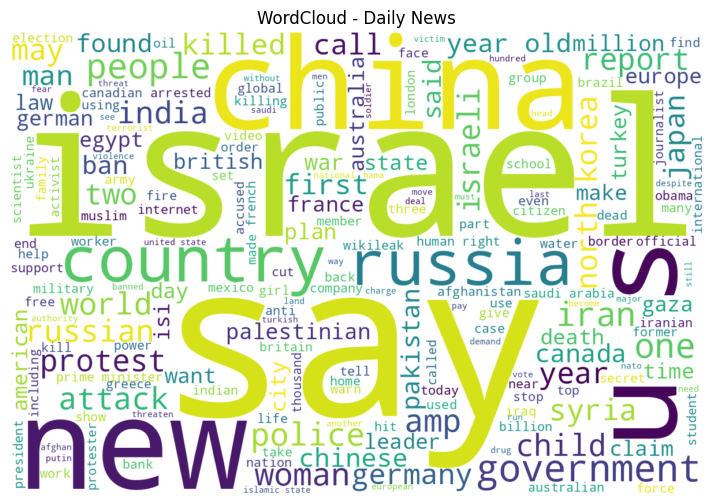


Most Common Words: [('say', 3415), ('year', 2484), ('world', 2433), ('new', 2420), ('china', 2201), ('israel', 2167), ('government', 2157), ('police', 1955), ('people', 1926), ('country', 1853), ('russia', 1740), ('state', 1642), ('war', 1617), ('000', 1502), ('woman', 1465), ('u.s.', 1461), ('israeli', 1450), ('attack', 1446), ('president', 1415), ('one', 1394)]

===== EDA FOR Press Releases  =====
Shape: (5000, 3)

Missing values:
 Date          0
News          0
clean_text    0
dtype: int64

Sample text:
 0    117-year-old woman mexico city finally receive...
1         imf chief back athens permanent olympic host
2             president france say brexit donald trump
3    british man must give police hour notice sex t...
4    100 nobel laureate urge greenpeace stop opposi...
Name: clean_text, dtype: object

Word Count Stats:
count    5000.000000
mean       11.651200
std         6.554489
min         2.000000
25%         7.000000
50%         9.000000
75%        14.000000
max        3

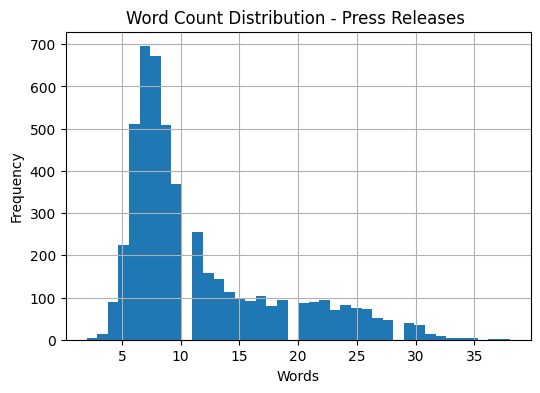

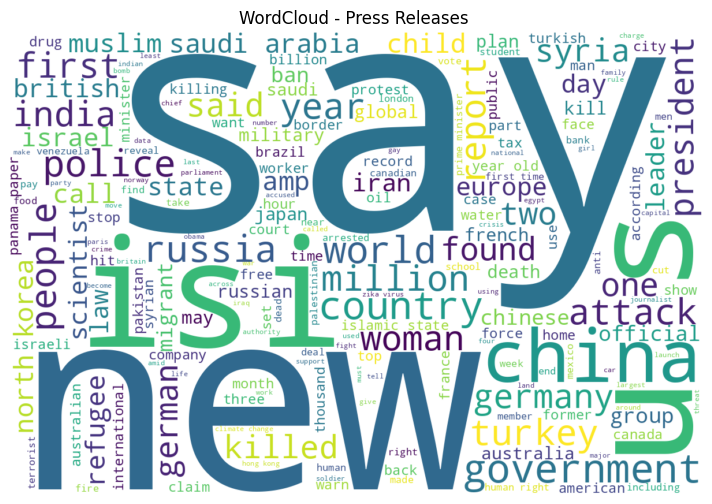


Most Common Words: [('say', 478), ('year', 286), ('new', 275), ('world', 227), ('china', 226), ('isi', 213), ('attack', 211), ('state', 208), ('000', 196), ('country', 188), ('government', 187), ('saudi', 178), ('police', 177), ('u.s.', 177), ('first', 176), ('million', 163), ('people', 160), ('north', 159), ('president', 155), ('woman', 154)]


In [8]:
# Function to perform Exploratory Data Analysis (EDA) on text datasets
def eda_text(df, name):
      # Print dataset name and basic shape information
    print(f"\n===== EDA FOR {name} =====")
    print("Shape:", df.shape)

    # Check and display missing values in each column
    print("\nMissing values:\n", df.isnull().sum())

    # Display a few sample cleaned text entries
    print("\nSample text:\n", df["clean_text"].head())

    # Calculate word count for each text entry
    df["word_count"] = df["clean_text"].apply(lambda x: len(str(x).split()))

    print("\nWord Count Stats:")
    print(df["word_count"].describe())

    # Plot distribution
    plt.figure(figsize=(6,4))
    df["word_count"].hist(bins=40)
    plt.title(f"Word Count Distribution - {name}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

    # Wordcloud
    text = " ".join(df["clean_text"].astype(str).tolist())
    wc = WordCloud(width=1200, height=800, background_color="white").generate(text)

    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud - {name}")
    plt.show()

    # Most common words
    all_words = text.split()
    freq = Counter(all_words).most_common(20)
    print("\nMost Common Words:", freq)


datasets_clean = [df1, df2, df3]
names_clean = ["Analyst Ratings", "Daily News",
               "Press Releases "]

for df, n in zip(datasets_clean, names_clean):
    eda_text(df, n)


In [9]:
# Function to perform data augmentation using synonym replacement
def synonym_augmentation(text, n=1):
    # Split the input text into individual words
    words = text.split()
    # Create a copy of the original words to apply replacements
    new_words = words.copy()
    random.shuffle(words)

    replaced = 0
    for word in words:
        syns = wordnet.synsets(word)
        if syns:
            synonym = syns[0].lemmas()[0].name()
            if synonym != word:
                new_words = [synonym if w == word else w for w in new_words]
                replaced += 1
        if replaced >= n:
            break

    return " ".join(new_words)


In [10]:
#entity masking|

# Function to perform entity and value masking for data augmentation
def entity_masking(text):
    # Replace numerical values and percentages with a generic VALUE token
    text = re.sub(r"\$?\d+(\.\d+)?%?", "<VALUE>", text)

    # Replace financial periods and years with a generic DATE token
    text = re.sub(r"\b(Q[1-4]|FY\d{2,4}|\d{4})\b", "<DATE>", text)

    return text


In [11]:
# Apply data augmentation techniques to all cleaned datasets

# Dataset 1: Analyst Ratings
df1["aug_synonym"] = df1["clean_text"].apply(
    lambda x: synonym_augmentation(x, 1)
)
df1["aug_masked"] = df1["clean_text"].apply(entity_masking)

# Dataset 2: Daily News
df2["aug_synonym"] = df2["clean_text"].apply(
    lambda x: synonym_augmentation(x, 1)
)
df2["aug_masked"] = df2["clean_text"].apply(entity_masking)

# Dataset 3: Sentiment / Additional Financial Text
df3["aug_synonym"] = df3["clean_text"].apply(
    lambda x: synonym_augmentation(x, 1)
)
df3["aug_masked"] = df3["clean_text"].apply(entity_masking)



In [12]:
#completed data preprocessing->explanatory data analysis->data augmentation

In [27]:
# ===============================
# MILESTONE 2: FINANCIAL NER MODEL TRAINING
# ===============================


In [13]:


# Prepare NER-ready dataset from cleaned text

# Standardize column name for NER processing
df1_ner = df1[["clean_text"]].rename(columns={"clean_text": "text"})
df2_ner = df2[["clean_text"]].rename(columns={"clean_text": "text"})
df3_ner = df3[["clean_text"]].rename(columns={"clean_text": "text"})

# Remove short or noisy sentences (NER quality control)
def filter_text(df, min_words=5):
    return df[df["text"].str.split().str.len() >= min_words]

df1_ner = filter_text(df1_ner)
df2_ner = filter_text(df2_ner)
df3_ner = filter_text(df3_ner)

# Sample equal number of sentences from each dataset
df1_sel = df1_ner.sample(1000, random_state=42)
df2_sel = df2_ner.sample(1000, random_state=42)
df3_sel = df3_ner.sample(1000, random_state=42)

# Combine datasets into a single NER corpus
ner_dataset = pd.concat([df1_sel, df2_sel, df3_sel], ignore_index=True)

# Save dataset for BIO tagging
ner_dataset.to_json(
    "ner_text_for_biotagging_3000.json",
    orient="records",
    indent=2
)

print("Total sentences:", len(ner_dataset))


Total sentences: 3000


In [14]:
# Defining Financial Entity Labels for NER

# List of domain-specific financial entity types
LABELS = [
    "ORG",      # Organization names (e.g., Apple, Microsoft)
    "TICKER",   # Stock tickers (e.g., AAPL, MSFT)
    "METRIC",   # Financial metrics (e.g., revenue, profit)
    "VALUE",    # Numerical values (e.g., $50, 10%)
    "RATIO",    # Financial ratios (e.g., ROE, EBITDA margin)
    "DATE",     # Dates or financial periods (e.g., 2023, Q4)
    "EVENT"     # Financial events (e.g., merger, acquisition)
]

# Initialize BIO label list with Outside tag
BIO_LABELS = ["O"]

# Create BIO-format labels for each entity type
for label in LABELS:
    BIO_LABELS.append(f"B-{label}")  # Beginning of entity
    BIO_LABELS.append(f"I-{label}")  # Inside entity

# Display final list of BIO labels
BIO_LABELS


['O',
 'B-ORG',
 'I-ORG',
 'B-TICKER',
 'I-TICKER',
 'B-METRIC',
 'I-METRIC',
 'B-VALUE',
 'I-VALUE',
 'B-RATIO',
 'I-RATIO',
 'B-DATE',
 'I-DATE',
 'B-EVENT',
 'I-EVENT']

In [15]:
!pip install seqeval


In [16]:
# Convert sentence to BIO rows
def sentence_to_bio_rows(sentence):
    tokens = sentence.split()
    return [(token, "O") for token in tokens]

# Save BIO file
def save_bio_file(bio_sentences, filename):
    with open(filename, "w", encoding="utf-8") as f:
        for sentence in bio_sentences:
            for token, label in sentence:
                f.write(f"{token} {label}\n")
            f.write("\n")

# Rule-based auto BIO tagging
def auto_bio_tag(sentence):
    tokens = sentence.split()
    bio_tags = []
    prev_org = False

    for tok in tokens:
        if re.fullmatch(r"\$?\d+(\.\d+)?%?", tok):
            bio_tags.append((tok, "B-VALUE"))
            prev_org = False
        elif re.fullmatch(r"(q[1-4]|\d{4})", tok):
            bio_tags.append((tok, "B-DATE"))
            prev_org = False
        elif tok.istitle():
            if prev_org:
                bio_tags.append((tok, "I-ORG"))
            else:
                bio_tags.append((tok, "B-ORG"))
            prev_org = True
        else:
            bio_tags.append((tok, "O"))
            prev_org = False

    return bio_tags


In [17]:
# Apply automatic BIO tagging to the entire NER dataset
bio_sentences = ner_dataset["text"].apply(auto_bio_tag).tolist()

# Save BIO-tagged dataset for reference
save_bio_file(bio_sentences, "financial_ner_bio.txt")
# Separate tokens and BIO labels
sentences = [[tok for tok, lab in sent] for sent in bio_sentences]
labels    = [[lab for tok, lab in sent] for sent in bio_sentences]

# Optional: limit size for faster training
sentences = sentences[:3000]
labels    = labels[:3000]
# Map BIO labels to numerical IDs
label2id = {label: idx for idx, label in enumerate(BIO_LABELS)}
id2label = {idx: label for label, idx in label2id.items()}
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset
import numpy as np
from seqeval.metrics import classification_report

# Load FinBERT (financial-domain pretrained model)
model_name = "ProsusAI/finbert"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForTokenClassification.from_pretrained(
    model_name,
    num_labels=len(BIO_LABELS),
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
)


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([15, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([15]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
# Tokenize text and align BIO labels with subword tokens
def tokenize_and_align(sentences, labels):
    encodings = tokenizer(
        sentences,
        is_split_into_words=True,
        truncation=True,
        padding=True
    )

    aligned_labels = []
    for i in range(len(sentences)):
        word_ids = encodings.word_ids(batch_index=i)
        prev_word = None
        label_ids = []

        for word_id in word_ids:
            if word_id is None:
                label_ids.append(-100)
            elif word_id != prev_word:
                label_ids.append(label2id[labels[i][word_id]])
            else:
                label_ids.append(-100)
            prev_word = word_id

        aligned_labels.append(label_ids)

    encodings["labels"] = aligned_labels
    return encodings


# Tokenize dataset
tokenized_data = tokenize_and_align(sentences, labels)
# Create training dataset
train_dataset = Dataset.from_dict({
    "input_ids": tokenized_data["input_ids"],
    "attention_mask": tokenized_data["attention_mask"],
    "labels": tokenized_data["labels"]
})
# Define training configuration
training_args = TrainingArguments(
    output_dir="./finbert_output",
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    num_train_epochs=1,
    logging_steps=20,
    save_strategy="no",
    report_to="none"
)


In [19]:
# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer
)

# Train FinBERT for Financial NER
trainer.train()


Step,Training Loss
20,0.405800
40,0.071300
60,0.052600
80,0.017800
100,0.009300
120,0.005700
140,0.004300
160,0.003400
180,0.003000


TrainOutput(global_step=188, training_loss=0.06109264108570332, metrics={'train_runtime': 259.7883, 'train_samples_per_second': 11.548, 'train_steps_per_second': 0.724, 'total_flos': 761014168110000.0, 'train_loss': 0.06109264108570332, 'epoch': 1.0})

In [20]:
save_path = "/content/drive/MyDrive/MyFinBERT_Model"

trainer.save_model(save_path)
tokenizer.save_pretrained(save_path)

print("Model saved to:", save_path)


Model saved to: /content/drive/MyDrive/MyFinBERT_Model


In [21]:
# Evaluate model on training data
predictions = trainer.predict(train_dataset)

pred_ids = np.argmax(predictions.predictions, axis=2)
true_ids = predictions.label_ids

true_labels, pred_labels = [], []

for i in range(len(true_ids)):
    t, p = [], []
    for j in range(len(true_ids[i])):
        if true_ids[i][j] != -100:
            t.append(id2label[true_ids[i][j]])
            p.append(id2label[pred_ids[i][j]])
    true_labels.append(t)
    pred_labels.append(p)

# Print Precision, Recall, and F1-score
print(classification_report(true_labels, pred_labels))


              precision    recall  f1-score   support

       VALUE       0.98      1.00      0.99      4162

   micro avg       0.98      1.00      0.99      4162
   macro avg       0.98      1.00      0.99      4162
weighted avg       0.98      1.00      0.99      4162



In [28]:
# ===============================
# MILESTONE 3: MODEL INFERENCE
# ===============================


In [22]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

model_path = "/content/drive/MyDrive/MyFinBERT_Model"

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForTokenClassification.from_pretrained(model_path)

print("Loaded labels:", model.config.id2label)

ner_pipeline = pipeline(
    "ner",
    model=model,
    tokenizer=tokenizer,
    aggregation_strategy=None
)

# List of test sentences
sentences = [
    "Tesla recorded vehicle deliveries of 443,956 units during Q1 2023.",
    "Reliance Industries announced a capital expenditure plan worth ₹75,000 crore for FY25.",
    "Meta Platforms saw advertising revenue rise to $31.5 billion in the first quarter of 2024.",
    "Infosys declared an earnings per share of ₹18.3 for the quarter ended March 2024.",
    "Samsung Electronics posted semiconductor losses of ₩4.6 trillion in Q2 2023.",
]

# Run inference sentence by sentence
for sentence in sentences:
    print("\nSentence:", sentence)
    print("=" * 40)

    results = ner_pipeline(sentence)

    if not results:
        print("No entities detected.")
    else:
        for ent in results:
            print("Token      :", ent["word"])
            print("Label      :", ent["entity"])
            print("Confidence :", round(float(ent["score"]), 2))
            print("-" * 30)

current_value = ""
for ent in results:
    if ent["entity"].endswith("VALUE"):
        current_value += ent["word"].replace("##", "")
    else:
        if current_value:
            print("Detected VALUE:", current_value)
            current_value = ""


Device set to use cuda:0


Loaded labels: {0: 'O', 1: 'B-ORG', 2: 'I-ORG', 3: 'B-TICKER', 4: 'I-TICKER', 5: 'B-METRIC', 6: 'I-METRIC', 7: 'B-VALUE', 8: 'I-VALUE', 9: 'B-RATIO', 10: 'I-RATIO', 11: 'B-DATE', 12: 'I-DATE', 13: 'B-EVENT', 14: 'I-EVENT'}

Sentence: Tesla recorded vehicle deliveries of 443,956 units during Q1 2023.
Token      : ##3
Label      : B-VALUE
Confidence : 0.52
------------------------------
Token      : 95
Label      : B-VALUE
Confidence : 0.52
------------------------------
Token      : 202
Label      : B-VALUE
Confidence : 0.82
------------------------------
Token      : ##3
Label      : B-VALUE
Confidence : 0.62
------------------------------

Sentence: Reliance Industries announced a capital expenditure plan worth ₹75,000 crore for FY25.
Token      : ##75
Label      : B-VALUE
Confidence : 0.61
------------------------------
Token      : 000
Label      : B-VALUE
Confidence : 0.81
------------------------------

Sentence: Meta Platforms saw advertising revenue rise to $31.5 billion in the 

In [29]:
# ===============================
# MILESTONE 4: PDF FINANCIAL EXTRACTION
# ===============================


In [23]:
!pip install pdfplumber


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 120.9 MB/s eta 0:00:00


In [25]:
import pdfplumber
import re
import json

# ---------- STEP 1: READ PDF ----------
pdf_path = "/content/input.pdf"   # uploaded PDF file

full_text = ""
with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        text = page.extract_text()
        if text:
            full_text += text + "\n"

# ---------- STEP 2: DEFINE SECTIONS ----------
sections = {
    "MD&A": "",
    "Risk Factors": "",
    "Balance Sheet": ""
}

current_section = None

for line in full_text.split("\n"):
    l = line.lower()

    if "management’s discussion" in l or "md&a" in l:
        current_section = "MD&A"
    elif "risk factors" in l:
        current_section = "Risk Factors"
    elif "balance sheet" in l:
        current_section = "Balance Sheet"

    if current_section:
        sections[current_section] += line + " "

# ---------- STEP 3: REGEX PATTERNS ----------
metric_pattern = r"(sales|revenue|profit|loss|income|expenditure|cash flow)"
value_pattern  = r"\d+(?:,\d+)*(?:\.\d+)?"
date_pattern   = r"\b20\d{2}\b|FY\d{2,4}"

# ---------- STEP 4: BUILD FINAL JSON ----------
final_json = []

for section, content in sections.items():
    for sentence in content.split("."):
        metric = re.search(metric_pattern, sentence, re.IGNORECASE)
        value  = re.search(value_pattern, sentence)
        date   = re.search(date_pattern, sentence)

        if metric and value and date:
            final_json.append({
                "company": "Microsoft",
                "metric": metric.group(0),
                "value": value.group(0),
                "period": date.group(0),
                "section": section
            })

# ---------- STEP 5: DISPLAY OUTPUT IN COLAB ----------
print("=============== FINAL CORRECT JSON (COLAB OUTPUT) ===============")
print(json.dumps(final_json, indent=4))

# ---------- STEP 6: SAVE OUTPUT TO FILE ----------
output_path = "/content/milestone4_output.json"

with open(output_path, "w") as f:
    json.dump(final_json, f, indent=4)

print("\n✅ Output file successfully created at:")
print(output_path)


=============== FINAL CORRECT JSON (COLAB OUTPUT) ===============
[
    {
        "company": "Microsoft",
        "metric": "revenue",
        "value": "72,000",
        "period": "2023",
        "section": "MD&A"
    }
]

✅ Output file successfully created at:
/content/milestone4_output.json
